In [1]:
!pip install konlpy
!pip install WordCloud
!agt-get install fonts-nanum* -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 11.8 MB/s eta 0:00:00
/bin/bash: line 1: agt-get: command not found


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import konlpy

In [3]:
df=pd.read_csv('data/movie_review.csv')
df

,Review
0,또 이어지나요! 잼있게 보았어요~^^
1,사운드가 웅장하고 아이맥스로도 보고싶어지네요.. 파트3도 기다려집니다
2,압도적인 체험 입니다!
3,방식과 템포의 유지속에 할애한 시간만큼의 납득에는 의문
4,IMAX로 보는 듄 : 파트2 볼만했어요.
...,...
595,2회차인데 확실히 큰화면과 사운드 좋은걸로 보니 몰입감이 더 좋네여 이양이면 아이맥...
596,영화관에서 꼭 봐야하는 영화네요! 재밌게 잘 봤어요.
597,재밌어요~ 1을 안봤지만 ㅎㅎ
598,꼭 반드시 IMAX로!!!!


In [6]:
kkma=konlpy.tag.Kkma()

In [7]:
nouns=df['Review'].apply(kkma.nouns)
nouns

,Review
0,[잼]
1,"[사운드, 아이맥스, 지네, 파트, 파트3, 3]"
2,"[압도, 압도적인, 적인, 체험]"
3,"[방식, 템포, 유지, 유지속, 속, 할애, 시간, 시간만큼, 만큼, 납득, 의문]"
4,"[듄, 파트, 파트2, 2]"
...,...
595,"[2, 2회차, 회, 차, 화면, 사운드, 몰입, 몰입감이, 감이, 여, 양이면, ..."
596,"[영화관, 영화]"
597,[1]
598,[]


In [8]:
nouns=nouns.explode()
nouns

,Review
0,잼
1,사운드
1,아이맥스
1,지네
1,파트
...,...
599,1
599,1편
599,편
599,이해


In [9]:
nouns[nouns=='모시']='티모시'
nouns[nouns=='IMAX']='아이맥스'
nouns[nouns=='파트3']='티모시'


In [10]:
df_word=pd.DataFrame({'word':nouns})
df_word['count']=df_word['word'].str.len()
df_word=df_word.query('count>=2')
df_word

,word,count
1,사운드,3.0
1,아이맥스,4.0
1,지네,2.0
1,파트,2.0
1,티모시,3.0
...,...,...
596,영화관,3.0
596,영화,2.0
599,1편,2.0
599,이해,2.0


In [12]:
df_word=df_word.groupby('word',as_index=False)
df_word=df_word.count().sort_values('count',ascending=False)
df_word

,word,count
728,영화,115
1032,티모시,85
656,아이맥스,57
614,시간,50
18,1편,47
...,...,...
443,방식,1
444,방어,1
445,방해,1
448,배경지식,1


In [13]:
del_idx=df_word.loc[df_word.word.isin(['영화','편이','영화관','파트'])].index
df_word=df_word.drop(index=del_idx)

In [29]:
!sudo apt-get install -y fonts-nanum
!rm -rf ~/.cache/matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,892 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and dire

In [31]:
import matplotlib.font_manager as fm
path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name=fm.FontProperties(fname=path,size=10).get_name()
plt.rc('font',family=font_name)
fm.fontManager.addfont(path)

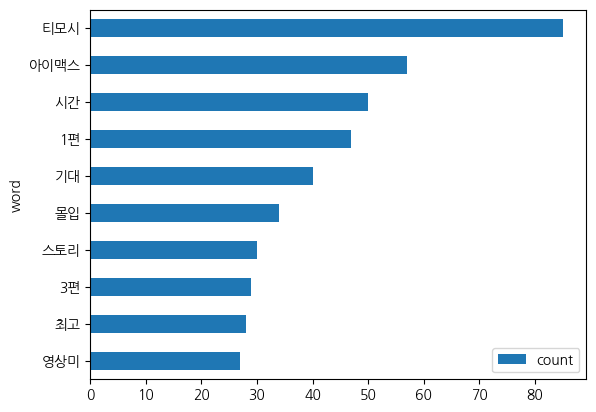

In [32]:
df_top10=df_word.iloc[:10,:].sort_values('count',ascending=True)
df_top10.plot.barh(x='word',y='count')
plt.show()

In [34]:
dic_word=df_word.set_index('word').to_dict()['count']
dic_word

{'티모시': 85,
 '아이맥스': 57,
 '시간': 50,
 '1편': 47,
 '기대': 40,
 '몰입': 34,
 '스토리': 30,
 '3편': 29,
 '최고': 28,
 '영상미': 27,
 '스케일': 23,
 '관람': 20,
 '사막': 19,
 '연기': 18,
 '가입': 18,
 '다음': 18,
 '사운드': 17,
 '배우': 16,
 '이해': 16,
 '몰입감': 15,
 '모래': 15,
 '3시간': 15,
 '듄1': 15,
 '내용': 15,
 '느낌': 15,
 '리산': 14,
 '2편': 14,
 '시작': 14,
 '연출': 13,
 '전개': 13,
 '파트2': 13,
 '세계관': 13,
 '압도': 13,
 '재미': 12,
 '감독': 12,
 '영상': 12,
 '음향': 12,
 '화면': 11,
 '듄3': 11,
 '장엄': 11,
 '파트1': 11,
 '타임': 11,
 '극장': 10,
 '이유': 10,
 '추천': 10,
 '음악': 10,
 '원작': 9,
 '전쟁': 9,
 '이상': 9,
 '이야기': 9,
 '장면': 9,
 '사람': 9,
 '하나': 9,
 '상영': 8,
 '진짜': 8,
 '만족': 8,
 '서사시': 8,
 '거대': 8,
 '스크린': 8,
 '제왕': 8,
 '볼만': 8,
 '듄2': 8,
 '액션': 8,
 '배경': 8,
 '완벽': 8,
 '반지': 8,
 '전편': 7,
 '주인공': 7,
 '러닝타임': 7,
 '러닝': 7,
 '보세': 7,
 '중간': 7,
 '다음편이': 7,
 '압도적': 7,
 '생각': 7,
 '자체': 7,
 '만큼': 6,
 '처음': 6,
 '적인': 6,
 '사랑': 6,
 '정도': 6,
 '상영시간': 6,
 '시리즈': 6,
 '일반': 6,
 '압도적인': 6,
 '종교': 6,
 '보고': 6,
 '소설': 6,
 '예매': 6,
 '전투': 5,
 '흥미': 5,
 '3부': 5,
 '오랜만': 

In [35]:
wc=WordCloud(random_state=123,font_path=path,width=400,height=400,background_color='white')

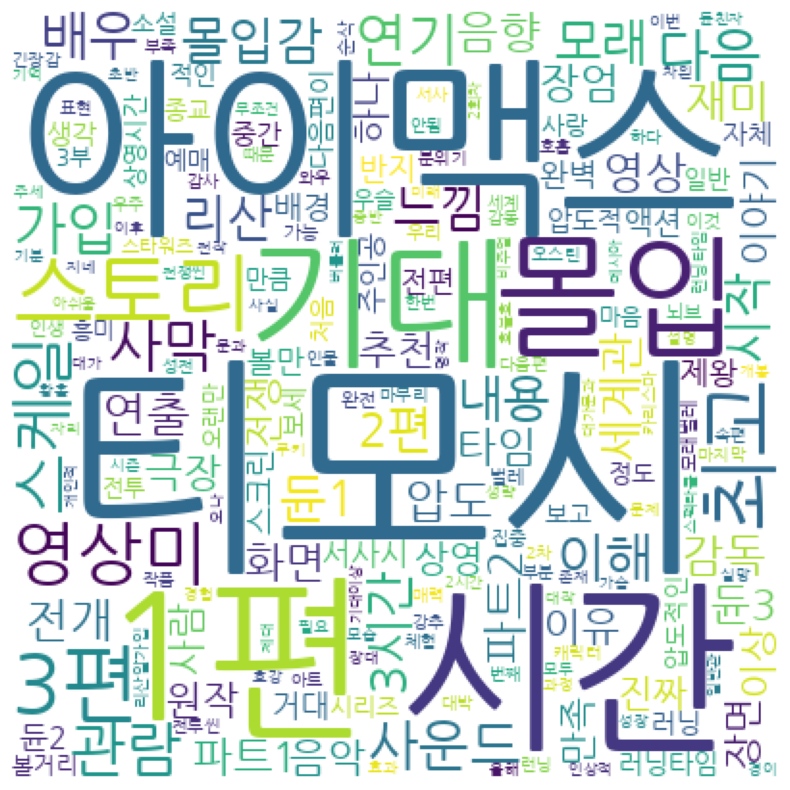

In [37]:
img_wordcloud=wc.generate_from_frequencies(dic_word)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_wordcloud)
plt.show()

In [39]:
import PIL
import numpy as np

icon=PIL.Image.open('data/cloud.png').convert('RGBA')
img=PIL.Image.new(mode='RGBA',size=icon.size,color=(255,255,255))
img.paste(icon,icon)
img=np.array(img)

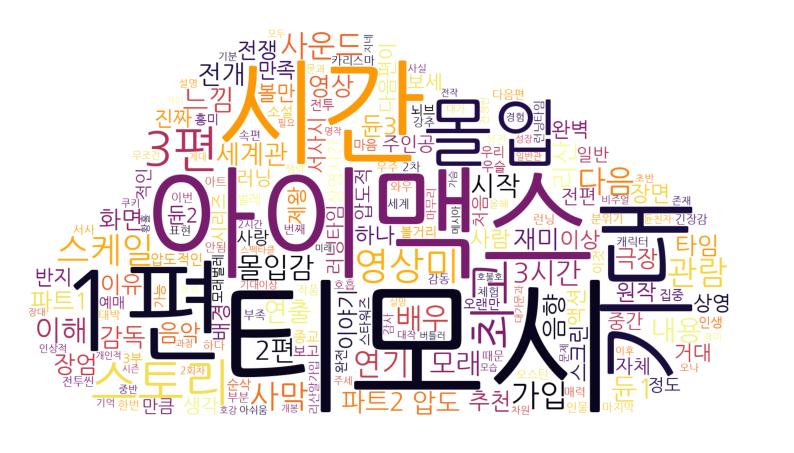

In [40]:
wc=WordCloud(random_state=123,font_path=path,width=400,height=400,
             background_color='white',mask=img,colormap='inferno')
img_wordcloud=wc.generate_from_frequencies(dic_word)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_wordcloud)
plt.show()

In [41]:
!pip install mlxtend

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder


In [44]:
df=pd.read_csv('chipotle.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction         4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   Item                4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [45]:
df.head()

,Transaction,quantity,Item,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [46]:
len(df['Item'].unique())

50

In [47]:
temp=df[df['item_price']==df['item_price'].max()]
temp=temp[['Item','item_price']].drop_duplicates()
temp

,Item,item_price
3598,Chips and Fresh Tomato Salsa,44.25


In [48]:
temp=df[df['item_price']==df['item_price'].min()]
temp=temp[['Item','item_price']].drop_duplicates()
temp

,Item,item_price
28,Canned Soda,1.09
34,Bottled Water,1.09


In [50]:
len(df['Transaction'].unique())

1834

In [51]:
sale_quantity=df.groupby('Item').count()
sales_quantity=sale_quantity.sort_values('Transaction',ascending=False)
sales_quantity['Transaction']

,Transaction
Item,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301
Chips,211
Steak Bowl,211
Bottled Water,162
Chicken Soft Tacos,115


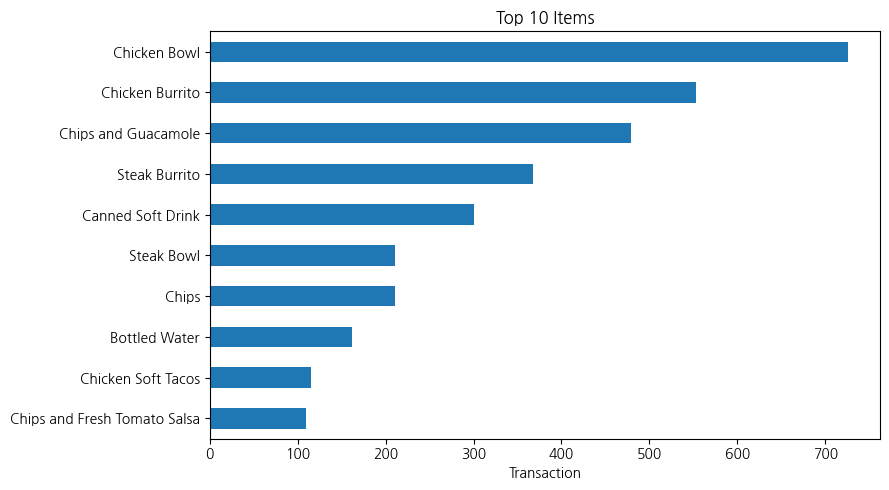

In [52]:
top_ten=sales_quantity.sort_values('Transaction').tail(10)
top_ten=top_ten['Transaction']
top_ten.plot.barh(xlabel='Transaction',ylabel='',title='Top 10 Items',figsize=(9,5))

plt.tight_layout()
plt.show()

In [53]:
temp=df[['Transaction','Item']].drop_duplicates()
temp=temp.groupby('Transaction')['Item'].apply(list)
temp

,Item
Transaction,
1,"[Chips and Fresh Tomato Salsa, Izze, Nantucket..."
2,[Chicken Bowl]
3,"[Chicken Bowl, Side of Chips]"
4,"[Steak Burrito, Steak Soft Tacos]"
5,"[Steak Burrito, Chips and Guacamole]"
...,...
1830,"[Steak Burrito, Veggie Burrito]"
1831,"[Carnitas Bowl, Chips, Bottled Water]"
1832,"[Chicken Soft Tacos, Chips and Guacamole]"


In [55]:
te=TransactionEncoder()
trans_matrix=te.fit(temp).transform(temp)
trans_matrix

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [56]:
basket=pd.DataFrame(trans_matrix,columns=te.columns_)
basket.head()

,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
freq_item=apriori(df=basket,min_support=0.01,use_colnames=True)
freq_item

,support,itemsets
0,0.029444,(6 Pack Soft Drink)
1,0.033261,(Barbacoa Bowl)
2,0.047983,(Barbacoa Burrito)
3,0.013631,(Barbacoa Soft Tacos)
4,0.083969,(Bottled Water)
...,...,...
75,0.014722,"(Chips and Guacamole, Veggie Bowl)"
76,0.016903,"(Chips and Guacamole, Veggie Burrito)"
77,0.015267,"(Bottled Water, Chips, Chicken Bowl)"
78,0.019084,"(Chips, Chicken Bowl, Canned Soft Drink)"


In [61]:
rules=association_rules(df=freq_item,metric='lift',min_threshold=1,num_itemsets=len(basket))
rules.sort_values('confidence',ascending=False,inplace=True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
36,"(Bottled Water, Chips)",(Chicken Bowl),0.019084,0.335333,0.015267,0.800000,2.385691,1.0,0.008868,3.323337,0.592135,0.045016,0.699098,0.422764
20,(Chips and Tomatillo Red Chili Salsa),(Chicken Bowl),0.025082,0.335333,0.015812,0.630435,1.880028,1.0,0.007402,1.798512,0.480136,0.045886,0.443985,0.338795
43,"(Chips, Canned Soft Drink)",(Chicken Bowl),0.031625,0.335333,0.019084,0.603448,1.799551,1.0,0.008479,1.676118,0.458816,0.054859,0.403383,0.330179
18,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,1.0,0.028490,1.607568,0.483072,0.174037,0.377942,0.392456
4,(Bottled Water),(Chicken Bowl),0.083969,0.335333,0.037623,0.448052,1.336142,1.0,0.009465,1.204221,0.274638,0.098571,0.169588,0.280124
37,"(Bottled Water, Chicken Bowl)",(Chips),0.037623,0.113413,0.015267,0.405797,3.578038,1.0,0.011000,1.492061,0.748685,0.112450,0.329786,0.270206
13,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,1.0,0.010059,1.111807,0.195642,0.142308,0.100564,0.291331
3,(6 Pack Soft Drink),(Chips and Guacamole),0.029444,0.258451,0.011450,0.388889,1.504688,1.0,0.003841,1.213443,0.345586,0.041420,0.175899,0.216596
11,(Canned Soda),(Steak Burrito),0.051254,0.186478,0.019629,0.382979,2.053751,1.0,0.010071,1.318467,0.540805,0.090000,0.241544,0.244121
49,"(Chips and Guacamole, Canned Soft Drink)",(Chicken Bowl),0.033806,0.335333,0.012541,0.370968,1.106268,1.0,0.001205,1.056651,0.099421,0.035168,0.053613,0.204183


In [62]:
rules.iloc[0,:].transpose()

,36
antecedents,"(Bottled Water, Chips)"
consequents,(Chicken Bowl)
antecedent support,0.019084
consequent support,0.335333
support,0.015267
confidence,0.8
lift,2.385691
representativity,1.0
leverage,0.008868
conviction,3.323337
